<font color = "CornflowerBlue" ><br>
Bu zamana kadar öğrendiklerimizi bir veri seti üzerinde uygulayalım.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from wordcloud import WordCloud

In [6]:
!pip install matplotlib-venn

In [7]:
import matplotlib_venn as venn
from math import pi
from pandas.plotting import parallel_coordinates

In [8]:
data = pd.read_csv("StudentMentalHealth.csv")

In [9]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [11]:
data["CGPA_Base"] = [float(each.split("-")[0]) for each in data.iloc[:,5]]

In [12]:
data.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_Base
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.0
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No,3.5
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No,3.5
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,3.5
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No,2.5
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No,3.5


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [14]:
data.dropna(inplace=True)

# VISUALIZATION WITH BAR PLOT

In [15]:
course_list = list(data['What is your course?'].unique())

In [16]:
data['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [17]:
len(data['What is your course?'].unique())

49

In [18]:
course_cgpa_ratio = []

In [19]:
for i in course_list:
    x = data[data['What is your course?']==i]
    course_cgpa_rate = sum(x.CGPA_Base)/len(x)
    course_cgpa_ratio.append(course_cgpa_rate)                

In [20]:
df = pd.DataFrame({'course_list':course_list, 'course_cgpa_ratio':course_cgpa_ratio})

In [21]:
new_index = (df['course_cgpa_ratio'].sort_values(ascending=False)).index.values

In [22]:
sorted_data = df.reindex(new_index)  #azalan sırada sıraladım.

Text(0.5, 1.0, 'Comparison of notes by courses')

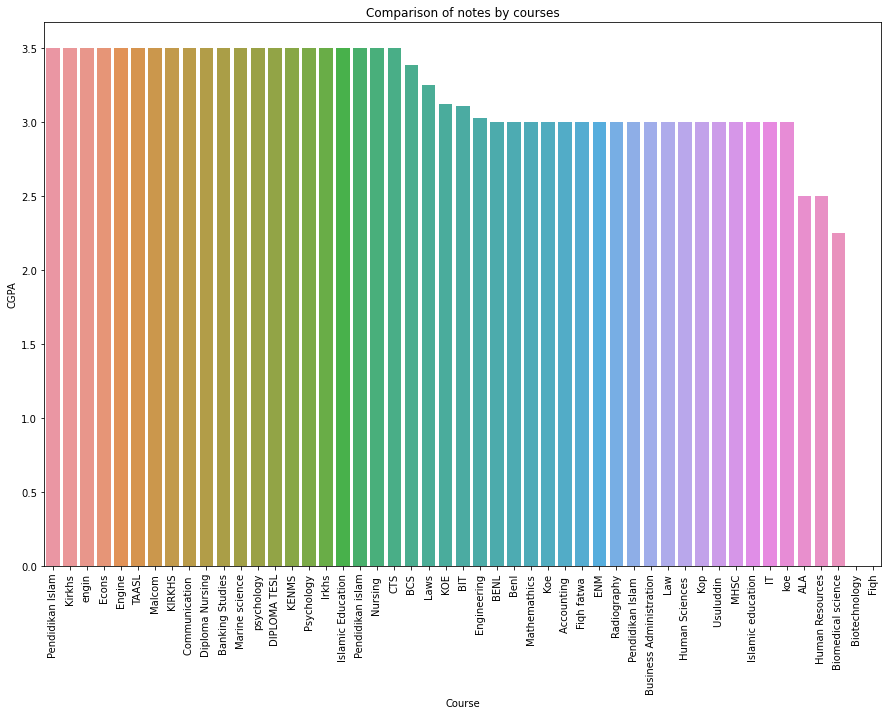

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['course_list'], y=sorted_data['course_cgpa_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Course')
plt.ylabel('CGPA')
plt.title('Comparison of notes by courses')

In [24]:
depression_list = list(data['Do you have Depression?'].unique())

In [25]:
data['Do you have Depression?'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
depression_age_ratio = []

In [27]:
for i in depression_list:
    x = data[data['Do you have Depression?']==i]
    depression_age_rate = sum(x.Age)/len(x)
    depression_age_ratio.append(depression_age_rate)                

In [28]:
df1 = pd.DataFrame({'depression_list':depression_list, 'depression_age_ratio':depression_age_ratio})

In [29]:
new_index1 = (df1['depression_age_ratio'].sort_values(ascending=False)).index.values

In [30]:
sorted_data1 = df1.reindex(new_index1)  #azalan sırada sıraladım.

Text(0.5, 1.0, 'Comparison of depression by age')

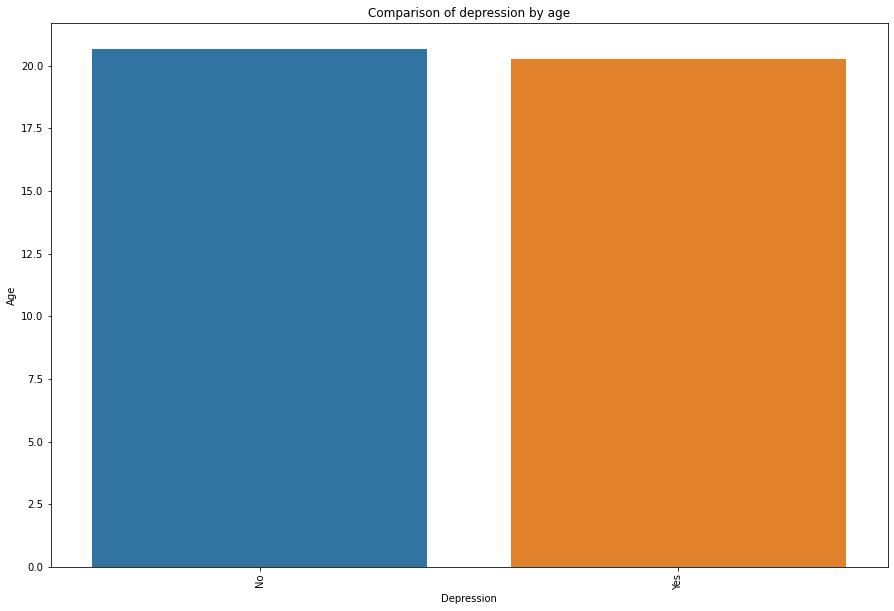

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data1['depression_list'], y=sorted_data1['depression_age_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Depression')
plt.ylabel('Age')
plt.title('Comparison of depression by age')

In [32]:
course_list = list(data['What is your course?'].unique())

In [33]:
course_age_ratio = []

In [34]:
for i in course_list:
    x = data[data['What is your course?']==i]
    course_age_rate = sum(x.Age)/len(x)
    course_age_ratio.append(course_age_rate)                

In [35]:
df2 = pd.DataFrame({'course_list':course_list, 'course_age_ratio':course_age_ratio})

In [36]:
new_index2 = (df2['course_age_ratio'].sort_values(ascending=False)).index.values

In [37]:
sorted_data2 = df2.reindex(new_index2)  #azalan sırada sıraladım.

Text(0.5, 1.0, 'Comparison of course by age')

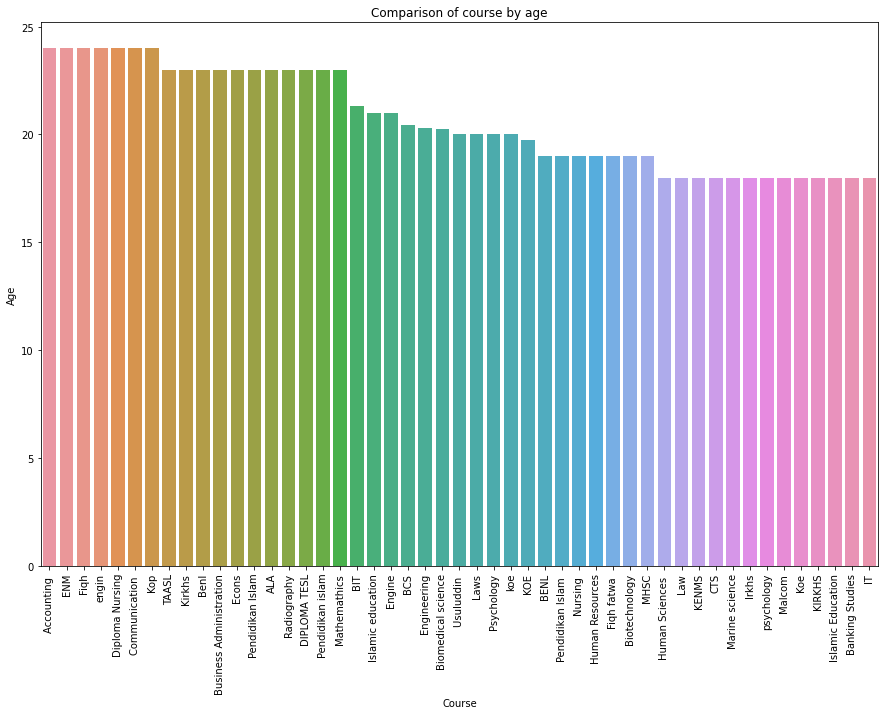

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['course_list'], y=sorted_data2['course_age_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Course')
plt.ylabel('Age')
plt.title('Comparison of course by age')

# VISUALIZATION WITH POINT PLOT

In [39]:
sorted_data['course_cgpa_ratio'] = sorted_data['course_cgpa_ratio']/max( sorted_data['course_cgpa_ratio'])
sorted_data2['course_age_ratio'] = sorted_data2['course_age_ratio']/max( sorted_data2['course_age_ratio'])

In [40]:
data_1 = pd.concat([sorted_data,sorted_data2['course_age_ratio']],axis=1)

In [41]:
data_1

,course_list,course_cgpa_ratio,course_age_ratio
0,Engineering,0.865546,0.845588
1,Islamic education,0.857143,0.875000
2,BIT,0.888889,0.888889
3,Laws,0.928571,0.833333
4,Mathemathics,0.857143,0.958333
5,Pendidikan islam,1.000000,0.958333
6,BCS,0.968254,0.851852
7,Human Resources,0.714286,0.791667
8,Irkhs,1.000000,0.750000
9,Psychology,1.000000,0.833333


In [42]:
data_1.sort_values('course_cgpa_ratio',inplace=True)

In [43]:
data_1.head()

,course_list,course_cgpa_ratio,course_age_ratio
45,Fiqh,0.000000,1.000000
36,Biotechnology,0.000000,0.791667
23,Biomedical science,0.642857,0.843750
22,ALA,0.714286,0.958333
7,Human Resources,0.714286,0.791667


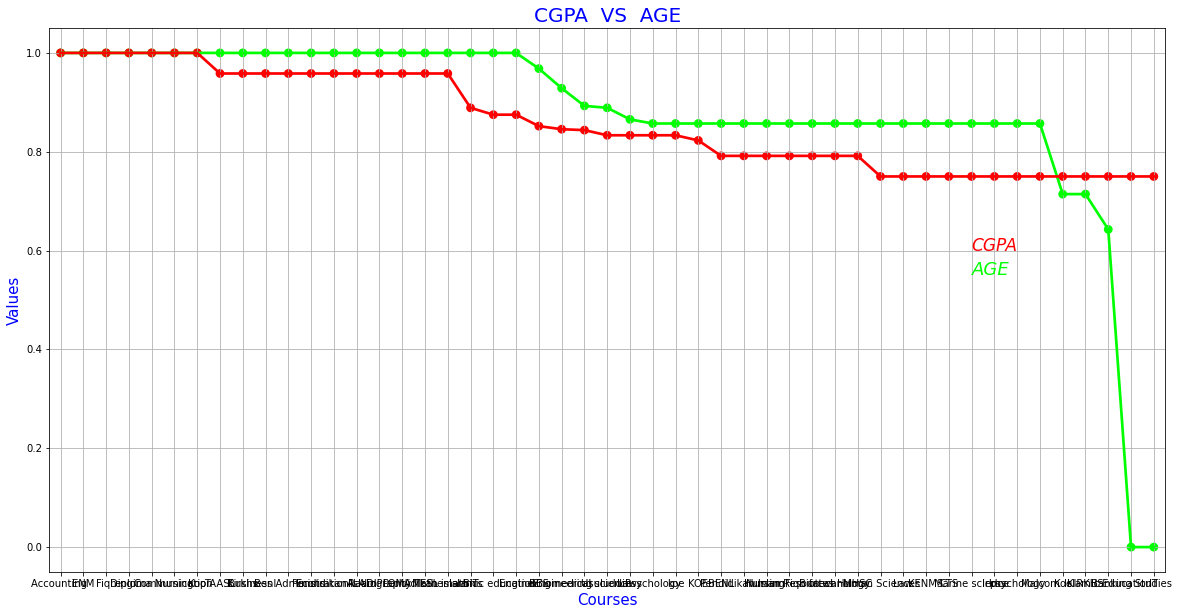

In [44]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='course_list',y='course_cgpa_ratio',data=sorted_data,color='lime',alpha=0.8)
sns.pointplot(x='course_list',y='course_age_ratio',data=sorted_data2 ,color='red',alpha=0.8)
plt.text(40,0.6,'CGPA',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'AGE',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('Courses',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('CGPA  VS  AGE',fontsize = 20,color='blue')
plt.grid()

<font color="MediumSeaGreen"><br>
Çıktıyı yorumlayalım. CGPA azalırken, AGE değerleride azalan yöndedir. Dolayısıyla doğru orantı vardır diyebiliriz.

# JOINT PLOT

C:\Users\raziy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\raziy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


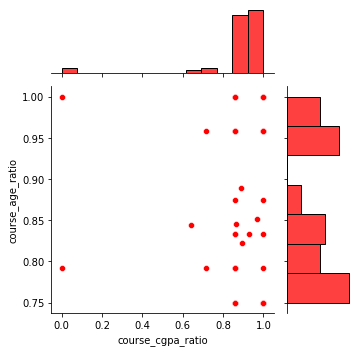

In [45]:
g = sns.jointplot("course_cgpa_ratio", "course_age_ratio", data=data_1,size=5, ratio=3, color="r")

<font color="Salmon"><br>
Çıktıyı yorumlayalım. Figürün üst kısmındaki barlara bakın ve orada en uzun bar 1.0 değerine karşılık geliyor. Bunun anlamı, verisetinde course_cgpa_ratio sütunu içerisinde en çok 1.0 değeri bulunmaktaymış.

# PIE PLOT

In [46]:
data.rename(columns ={'Your current year of Study':'current_year'},inplace=True)

In [47]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,current_year,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_Base
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.0


In [48]:
len(data.current_year.unique())

7

In [49]:
labels = data.current_year.value_counts().index

In [50]:
colors = ['grey','blue','red','yellow','green','brown']

In [51]:
explode = [0,0,0,0,0,0,0]

In [52]:
sizes = data.current_year.value_counts().values

Text(0.5, 1.0, 'Killed People According to Races')

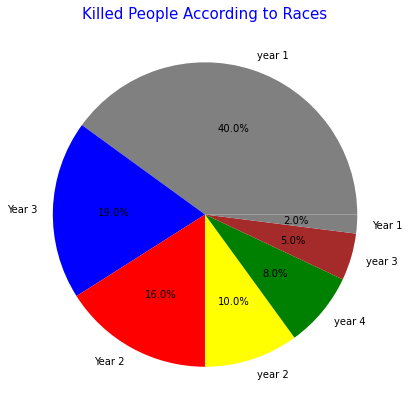

In [53]:
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

# LINE PLOT

In [54]:
data['year_num'] = [int(each.split(" ")[1]) for each in data.iloc[:,4]]

In [55]:
data = data.sort_values('year_num')

In [56]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,current_year,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_Base,year_num
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.0,1
35,8/7/2020 14:43,Female,18.0,Engineering,year 1,2.00 - 2.49,No,No,No,No,No,2.0,1
37,8/7/2020 14:45,Female,19.0,BIT,year 1,2.50 - 2.99,No,Yes,Yes,Yes,No,2.5,1
38,8/7/2020 14:47,Female,18.0,KIRKHS,year 1,3.50 - 4.00,No,No,No,No,No,3.5,1
45,8/7/2020 15:09,Male,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,Yes,No,3.5,1


In [57]:
data.year_num.unique()

array([1, 2, 3, 4], dtype=int64)

In [58]:
sayac=0
for each in data.iloc[:,12]:
    if each==1:
        sayac+=1
        
sayac

42

In [59]:
df4 = data.iloc[:101,:]
df4

,Timestamp,Choose your gender,Age,What is your course?,current_year,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_Base,year_num
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.0,1
35,8/7/2020 14:43,Female,18.0,Engineering,year 1,2.00 - 2.49,No,No,No,No,No,2.0,1
37,8/7/2020 14:45,Female,19.0,BIT,year 1,2.50 - 2.99,No,Yes,Yes,Yes,No,2.5,1
38,8/7/2020 14:47,Female,18.0,KIRKHS,year 1,3.50 - 4.00,No,No,No,No,No,3.5,1
45,8/7/2020 15:09,Male,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,Yes,No,3.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No,3.5,4
47,8/7/2020 15:14,Female,18.0,Engine,year 4,3.50 - 4.00,No,No,No,No,No,3.5,4
17,8/7/2020 12:52,Female,24.0,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,Yes,No,3.0,4
29,8/7/2020 14:05,Female,24.0,BCS,year 4,3.50 - 4.00,No,No,No,No,No,3.5,4


In [65]:
#Kabaca her iki sütun değerlerinide 0 ile 1 aralığına çekerek dağılımın biraz daha ilişkili olmasını amaçladım.
df4['Age'] = df4['Age']/max( df4['Age'])
df4['CGPA_Base'] = df4['CGPA_Base']/max( df4['CGPA_Base'])

In [66]:
from plotly.offline import iplot #iplot(fig) satırının çalışabilmesi için bu import'a ihtiyaç var. 

# Creating trace1
trace1 = go.Scatter(
                    x = df4.year_num,
                    y = df4.Age,
                    mode = "lines",
                    name = "Age",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df4.Timestamp)
# Creating trace2
trace2 = go.Scatter(
                    x = df4.year_num,
                    y = df4.CGPA_Base,
                    mode = "lines+markers",
                    name = "CGPA_Base",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df4.Timestamp)
data = [trace1, trace2]
layout = dict(title = 'Age and CGPA',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)